In [1]:
# ----------------------------------------------------------------------------
# BAGIAN 1: PERSIAPAN LINGKUNGAN (INFRASTRUKTUR)
# ----------------------------------------------------------------------------
print("=" * 70)
print("BAGIAN 1: INSTALASI & SETUP KAFKA + SPARK")
print("=" * 70)

print("\n💡 YANG AKAN DIINSTALL:")
print("   1. Java 8 (dependency Spark & Kafka)")
print("   2. Apache Kafka 3.6.0 (message broker)")
print("   3. Apache Spark 3.5.0 (stream processor)")
print("   4. Python libraries (kafka-python, findspark)")
print("\n⏳ Proses ini butuh ~2-3 menit, sabar ya...\n")

# Langkah 1: Instalasi Dependensi
print("-" * 70)
print("LANGKAH 1: INSTALASI JAVA & DOWNLOAD KAFKA/SPARK")
print("-" * 70)

# 1. Install Java 8
print("\n📦 Installing Java 8...")
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
print("   ✅ Java 8 installed")

# 2. Download Apache Kafka
print("\n📦 Downloading Apache Kafka 3.6.0...")
!wget -q https://archive.apache.org/dist/kafka/3.6.0/kafka_2.12-3.6.0.tgz
!tar -xzf kafka_2.12-3.6.0.tgz
print("   ✅ Kafka extracted")

# 3. Download Apache Spark
print("\n📦 Downloading Apache Spark 3.5.0...")
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
print("   ✅ Spark extracted")

# 4. Install Python libraries
print("\n📦 Installing Python libraries...")
!pip install -q findspark kafka-python
print("   ✅ Libraries installed")

print("\n🎉 SEMUA INSTALASI SELESAI!\n")

# Langkah 2: Konfigurasi Environment Variables
print("-" * 70)
print("LANGKAH 2: KONFIGURASI ENVIRONMENT VARIABLES")
print("-" * 70)

import os

# Set environment variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ["KAFKA_HOME"] = "/content/kafka_2.12-3.6.0"

print("\n✅ Environment variables configured:")
print(f"   JAVA_HOME: {os.environ['JAVA_HOME']}")
print(f"   SPARK_HOME: {os.environ['SPARK_HOME']}")
print(f"   KAFKA_HOME: {os.environ['KAFKA_HOME']}")

# Inisialisasi findspark
import findspark
findspark.init()
print("\n✅ Findspark initialized")

# Langkah 3: Menjalankan Kafka Server
print("\n" + "-" * 70)
print("LANGKAH 3: MENJALANKAN ZOOKEEPER & KAFKA BROKER")
print("-" * 70)

print("\n💡 PENJELASAN:")
print("   - Zookeeper: Koordinator Kafka (wajib jalan dulu)")
print("   - Kafka Broker: Server yang nerima & simpan data")
print("   - Kedua service jalan di background (daemon)")

import time

# 1. Jalankan Zookeeper
print("\n🔄 Starting Zookeeper...")
!nohup $KAFKA_HOME/bin/zookeeper-server-start.sh $KAFKA_HOME/config/zookeeper.properties > /dev/null 2>&1 &
print("   ⏳ Waiting for Zookeeper to start (10 seconds)...")
time.sleep(10)
print("   ✅ Zookeeper is running")

# 2. Jalankan Kafka Broker
print("\n🔄 Starting Kafka Broker...")
!nohup $KAFKA_HOME/bin/kafka-server-start.sh $KAFKA_HOME/config/server.properties > /dev/null 2>&1 &
print("   ⏳ Waiting for Kafka Broker to start (10 seconds)...")
time.sleep(10)
print("   ✅ Kafka Broker is running")

print("\n🎉 KAFKA SERVER SIAP DIGUNAKAN!")

# Langkah 4: Membuat Topik Kafka
print("\n" + "-" * 70)
print("LANGKAH 4: MEMBUAT KAFKA TOPIC")
print("-" * 70)

print("\n💡 TOPIC = Seperti folder/channel tempat data disimpan")
print("   Nama topic: 'transaksi-toko'")
print("   Partitions: 1 (untuk simplicity)")
print("   Replication: 1 (karena cuma 1 broker)")

# Membuat topic
!$KAFKA_HOME/bin/kafka-topics.sh --create --topic transaksi-toko --bootstrap-server localhost:9092 --replication-factor 1 --partitions 1 2>/dev/null || echo "Topic sudah ada"

print("\n✅ Topic 'transaksi-toko' berhasil dibuat/sudah ada")

# Verifikasi topic
print("\n📋 List semua topics:")
!$KAFKA_HOME/bin/kafka-topics.sh --list --bootstrap-server localhost:9092

print("\n" + "=" * 70)
print("✅ SETUP KAFKA & SPARK SELESAI!")
print("=" * 70)

BAGIAN 1: INSTALASI & SETUP KAFKA + SPARK

💡 YANG AKAN DIINSTALL:
   1. Java 8 (dependency Spark & Kafka)
   2. Apache Kafka 3.6.0 (message broker)
   3. Apache Spark 3.5.0 (stream processor)
   4. Python libraries (kafka-python, findspark)

⏳ Proses ini butuh ~2-3 menit, sabar ya...

----------------------------------------------------------------------
LANGKAH 1: INSTALASI JAVA & DOWNLOAD KAFKA/SPARK
----------------------------------------------------------------------

📦 Installing Java 8...
   ✅ Java 8 installed

📦 Downloading Apache Kafka 3.6.0...
   ✅ Kafka extracted

📦 Downloading Apache Spark 3.5.0...
   ✅ Spark extracted

📦 Installing Python libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.3/326.3 kB 6.0 MB/s eta 0:00:00
   ✅ Libraries installed

🎉 SEMUA INSTALASI SELESAI!

----------------------------------------------------------------------
LANGKAH 2: KONFIGURASI ENVIRONMENT VARIABLES
----------------------------------------------------------------------

✅ Env

In [2]:
# ----------------------------------------------------------------------------
# BAGIAN 2: SIMULASI DATA STREAM (KAFKA PRODUCER)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 2: KAFKA PRODUCER (PENGIRIMAN DATA)")
print("=" * 70)

print("\n💡 SKENARIO:")
print("   Kita simulasi toko online yang nerima transaksi real-time")
print("   Producer akan kirim data transaksi ke Kafka setiap 0.1 detik")

from kafka import KafkaProducer
import json
import random
from datetime import datetime

# Langkah 5: Membuat Data Generator
print("\n" + "-" * 70)
print("LANGKAH 5: SETUP PRODUCER & DATA GENERATOR")
print("-" * 70)

# Fungsi serialisasi JSON
def json_serializer(data):
    return json.dumps(data).encode("utf-8")

# Inisialisasi Kafka Producer
print("\n🔌 Connecting to Kafka Broker...")
producer = KafkaProducer(
    bootstrap_servers=['localhost:9092'],
    value_serializer=json_serializer
)
print("✅ Producer connected to Kafka")

# Daftar produk dummy
products = ["Laptop", "Mouse", "Keyboard", "Monitor", "HDMI Cable", "Webcam", "Headset", "SSD"]

print("\n📦 Produk yang dijual:")
for idx, prod in enumerate(products, 1):
    print(f"   {idx}. {prod}")

# Fungsi untuk mengirim data streaming
def send_stream_data(topic_name, num_messages=50):
    """
    Mengirim data transaksi dummy ke Kafka

    Args:
        topic_name: Nama topic Kafka
        num_messages: Jumlah pesan yang dikirim
    """
    print(f"\n🚀 Mulai mengirim {num_messages} transaksi ke topic '{topic_name}'...")
    print("   (Setiap transaksi dikirim dengan interval 0.1 detik)")

    for i in range(num_messages):
        # Generate data transaksi palsu
        data = {
            "transaction_id": i + 1,
            "product": random.choice(products),
            "price": random.randint(100000, 5000000),
            "quantity": random.randint(1, 5),
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        }

        # Kirim ke Kafka
        producer.send(topic_name, data)

        # Print setiap 10 transaksi untuk monitoring
        if (i + 1) % 10 == 0:
            print(f"   ✅ {i + 1}/{num_messages} transaksi terkirim...")

        # Simulasi jeda waktu (0.1 detik)
        time.sleep(0.1)

    print(f"\n🎉 Selesai mengirim {num_messages} transaksi!")

print("\n✅ Producer siap mengirim data")


BAGIAN 2: KAFKA PRODUCER (PENGIRIMAN DATA)

💡 SKENARIO:
   Kita simulasi toko online yang nerima transaksi real-time
   Producer akan kirim data transaksi ke Kafka setiap 0.1 detik

----------------------------------------------------------------------
LANGKAH 5: SETUP PRODUCER & DATA GENERATOR
----------------------------------------------------------------------

🔌 Connecting to Kafka Broker...
✅ Producer connected to Kafka

📦 Produk yang dijual:
   1. Laptop
   2. Mouse
   3. Keyboard
   4. Monitor
   5. HDMI Cable
   6. Webcam
   7. Headset
   8. SSD

✅ Producer siap mengirim data


In [3]:
# ----------------------------------------------------------------------------
# BAGIAN 3: PEMROSESAN DATA (SPARK STRUCTURED STREAMING)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 3: SPARK STRUCTURED STREAMING (CONSUMER)")
print("=" * 70)

print("\n💡 SKENARIO:")
print("   Spark akan:")
print("   1. Baca stream dari Kafka")
print("   2. Parse data JSON")
print("   3. Hitung total revenue per produk")
print("   4. Simpan hasil ke memory table")

# Langkah 6: Inisialisasi Spark Session
print("\n" + "-" * 70)
print("LANGKAH 6: INISIALISASI SPARK SESSION")
print("-" * 70)

from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json, col, sum as _sum, count as _count

print("\n🔄 Creating Spark Session with Kafka package...")

# Inisialisasi Spark dengan paket Kafka
spark = SparkSession.builder \
    .appName("KafkaSparkStreamingColab") \
    .config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.12:3.5.0") \
    .getOrCreate()

# Set log level untuk mengurangi noise
spark.sparkContext.setLogLevel("WARN")

print("✅ Spark Session aktif")
print(f"   Spark Version: {spark.version}")
print(f"   App Name: {spark.sparkContext.appName}")

# Langkah 7: Membaca Stream dari Kafka
print("\n" + "-" * 70)
print("LANGKAH 7: MEMBACA STREAM DARI KAFKA")
print("-" * 70)

from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# 1. Definisi Schema (struktur data JSON)
print("\n📐 Mendefinisikan schema data...")

schema = StructType([
    StructField("transaction_id", IntegerType(), True),
    StructField("product", StringType(), True),
    StructField("price", IntegerType(), True),
    StructField("quantity", IntegerType(), True),
    StructField("timestamp", StringType(), True)
])

print("   ✅ Schema defined:")
print("      - transaction_id: Integer")
print("      - product: String")
print("      - price: Integer")
print("      - quantity: Integer")
print("      - timestamp: String")

# 2. Read stream dari Kafka
print("\n📥 Connecting Spark to Kafka...")

df_raw = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "transaksi-toko") \
    .option("startingOffsets", "earliest") \
    .load()

print("   ✅ Connected to Kafka topic 'transaksi-toko'")

# 3. Parsing JSON
print("\n🔧 Parsing JSON data...")

df_parsed = df_raw.select(
    from_json(col("value").cast("string"), schema).alias("data")
).select("data.*")

print("   ✅ Data parsed successfully")
print("\n📋 Schema after parsing:")
df_parsed.printSchema()

# Langkah 8: Melakukan Analisis (Agregasi)
print("\n" + "-" * 70)
print("LANGKAH 8: ANALISIS DATA (AGREGASI)")
print("-" * 70)

print("\n💡 ANALISIS YANG DILAKUKAN:")
print("   1. Hitung revenue per transaksi (price × quantity)")
print("   2. Group by product")
print("   3. Sum total revenue & count transactions per product")
print("   4. Sort by total revenue (descending)")

# Tambah kolom revenue
df_with_revenue = df_parsed.withColumn("revenue", col("price") * col("quantity"))

# Agregasi per produk
df_analysis = df_with_revenue.groupBy("product") \
    .agg(
        _sum("revenue").alias("total_sales"),
        _count("transaction_id").alias("transaction_count")
    ) \
    .orderBy("total_sales", ascending=False)

print("\n✅ Analysis pipeline created")

# Langkah 9: Menjalankan Query & Simpan ke Memory
print("\n" + "-" * 70)
print("LANGKAH 9: MENJALANKAN STREAMING QUERY")
print("-" * 70)

print("\n💡 OUTPUT MODE: 'complete'")
print("   Artinya: Setiap update, semua hasil agregasi ditampilkan")
print("   (Bukan cuma data baru)")

# Menulis stream ke tabel in-memory
query = df_analysis.writeStream \
    .outputMode("complete") \
    .format("memory") \
    .queryName("sales_table") \
    .start()

print("\n✅ Streaming query started!")
print("   Query Name: sales_table")
print("   Status: Running in background")

print("\n" + "=" * 70)
print("✅ SPARK STREAMING CONSUMER SIAP!")
print("=" * 70)


BAGIAN 3: SPARK STRUCTURED STREAMING (CONSUMER)

💡 SKENARIO:
   Spark akan:
   1. Baca stream dari Kafka
   2. Parse data JSON
   3. Hitung total revenue per produk
   4. Simpan hasil ke memory table

----------------------------------------------------------------------
LANGKAH 6: INISIALISASI SPARK SESSION
----------------------------------------------------------------------

🔄 Creating Spark Session with Kafka package...
✅ Spark Session aktif
   Spark Version: 3.5.0
   App Name: KafkaSparkStreamingColab

----------------------------------------------------------------------
LANGKAH 7: MEMBACA STREAM DARI KAFKA
----------------------------------------------------------------------

📐 Mendefinisikan schema data...
   ✅ Schema defined:
      - transaction_id: Integer
      - product: String
      - price: Integer
      - quantity: Integer
      - timestamp: String

📥 Connecting Spark to Kafka...
   ✅ Connected to Kafka topic 'transaksi-toko'

🔧 Parsing JSON data...
   ✅ Data parsed s


BAGIAN 4: EKSEKUSI & MONITORING

----------------------------------------------------------------------
LANGKAH 10: SEND DATA & VIEW RESULTS
----------------------------------------------------------------------

🎬 DEMO: Kirim 50 transaksi pertama

🚀 Mulai mengirim 50 transaksi ke topic 'transaksi-toko'...
   (Setiap transaksi dikirim dengan interval 0.1 detik)
   ✅ 10/50 transaksi terkirim...
   ✅ 20/50 transaksi terkirim...
   ✅ 30/50 transaksi terkirim...
   ✅ 40/50 transaksi terkirim...
   ✅ 50/50 transaksi terkirim...

🎉 Selesai mengirim 50 transaksi!

⏳ Waiting for Spark to process data (5 seconds)...

📊 HASIL ANALISIS REAL-TIME (Batch 1)
+-------+-----------+-----------------+
|product|total_sales|transaction_count|
+-------+-----------+-----------------+
+-------+-----------+-----------------+


💡 PENJELASAN OUTPUT:
   - product: Nama produk
   - total_sales: Total revenue dari produk tersebut
   - transaction_count: Berapa kali produk terjual

🎬 DEMO: Kirim 50 transaksi TAMBA

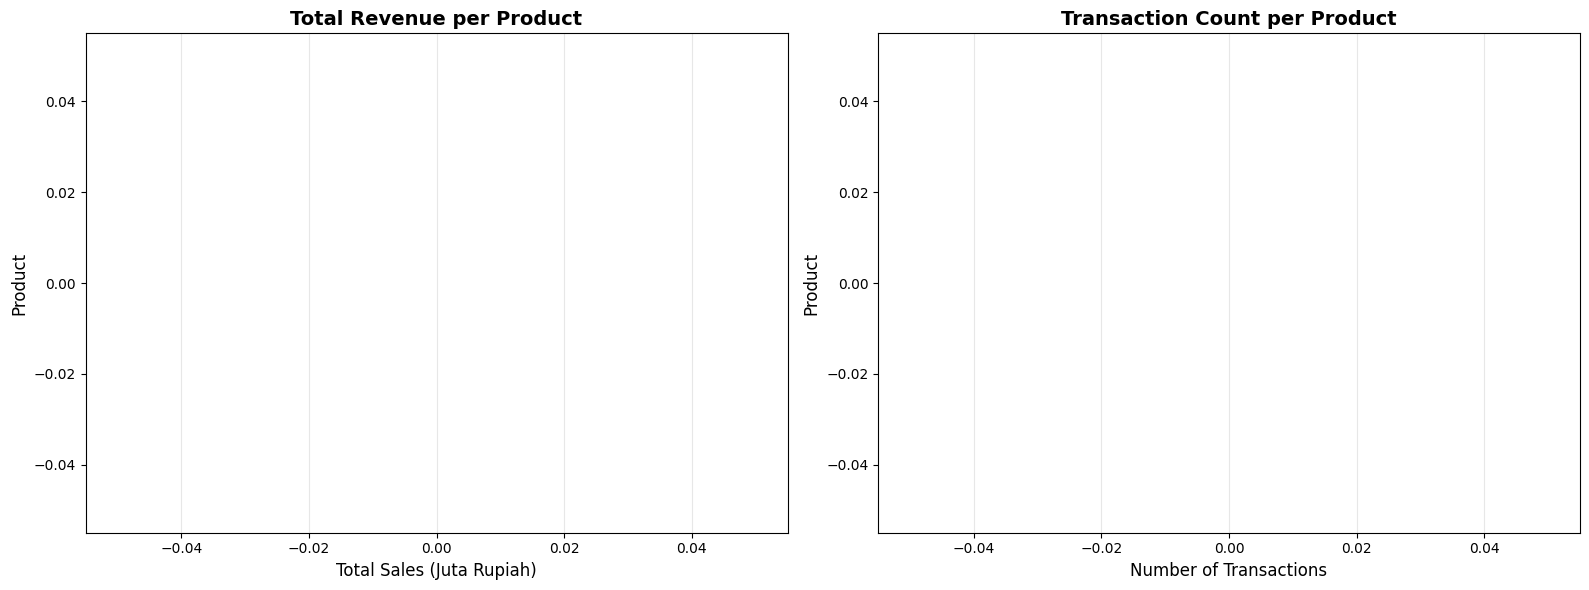


✅ Visualisasi selesai!


In [4]:
# ----------------------------------------------------------------------------
# BAGIAN 4: EKSEKUSI DAN MONITORING
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 4: EKSEKUSI & MONITORING")
print("=" * 70)

# Langkah 10: Mengirim Data & Melihat Hasil
print("\n" + "-" * 70)
print("LANGKAH 10: SEND DATA & VIEW RESULTS")
print("-" * 70)

print("\n🎬 DEMO: Kirim 50 transaksi pertama")
send_stream_data("transaksi-toko", num_messages=50)

print("\n⏳ Waiting for Spark to process data (5 seconds)...")
time.sleep(5)

print("\n" + "=" * 70)
print("📊 HASIL ANALISIS REAL-TIME (Batch 1)")
print("=" * 70)

# Query hasil dari memory table
result = spark.sql("SELECT * FROM sales_table")
result.show(truncate=False)

print("\n💡 PENJELASAN OUTPUT:")
print("   - product: Nama produk")
print("   - total_sales: Total revenue dari produk tersebut")
print("   - transaction_count: Berapa kali produk terjual")

# Kirim batch kedua
print("\n" + "=" * 70)
print("🎬 DEMO: Kirim 50 transaksi TAMBAHAN (Batch 2)")
print("=" * 70)

send_stream_data("transaksi-toko", num_messages=50)

print("\n⏳ Waiting for Spark to process (5 seconds)...")
time.sleep(5)

print("\n" + "=" * 70)
print("📊 HASIL ANALISIS REAL-TIME (Batch 1 + 2)")
print("=" * 70)

result = spark.sql("SELECT * FROM sales_table")
result.show(truncate=False)

print("\n💡 PERHATIKAN:")
print("   Total sales BERTAMBAH karena ada 50 transaksi baru!")
print("   Ini yang dimaksud REAL-TIME STREAMING!")

# Visualisasi
print("\n📊 VISUALISASI HASIL...")

import matplotlib.pyplot as plt
import pandas as pd

# Konversi ke Pandas untuk plotting
pdf_result = result.toPandas().sort_values('total_sales', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar Chart - Total Sales
axes[0].barh(pdf_result['product'], pdf_result['total_sales'] / 1000000, color='steelblue')
axes[0].set_xlabel('Total Sales (Juta Rupiah)', fontsize=12)
axes[0].set_ylabel('Product', fontsize=12)
axes[0].set_title('Total Revenue per Product', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Bar Chart - Transaction Count
axes[1].barh(pdf_result['product'], pdf_result['transaction_count'], color='coral')
axes[1].set_xlabel('Number of Transactions', fontsize=12)
axes[1].set_ylabel('Product', fontsize=12)
axes[1].set_title('Transaction Count per Product', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualisasi selesai!")

In [16]:
import time

# ----------------------------------------------------------------------------
# BAGIAN 5: TUGAS MANDIRI (LATIHAN)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 5: TUGAS MANDIRI")
print("=" * 70)

# Stop all active streaming queries before starting new ones to avoid name conflicts
for s in spark.streams.active:
    s.stop()
print("\n✅ Stopped all active Spark streaming queries (if any).")

# TUGAS 1: Tambah kolom Total Quantity
print("\n📝 TUGAS 1: Tambah Kolom Total Quantity")
print("-" * 70)

print("\n💡 TUJUAN: Hitung total quantity (barang terjual) per produk")

df_analysis_extended = df_with_revenue.groupBy("product") \
    .agg(
        _sum("revenue").alias("total_sales"),
        _count("transaction_id").alias("transaction_count"),
        _sum("quantity").alias("total_quantity")  # TAMBAHAN: Total quantity
    ) \
    .orderBy("total_sales", ascending=False)

# Tulis ke memory table baru
query_extended = df_analysis_extended.writeStream \
    .outputMode("complete") \
    .format("memory") \
    .queryName("sales_table_extended") \
    .start()

print("✅ Query extended created")

# Send some data for the extended query to process
print("\n🚀 Sending 30 transactions for TUGAS 1...")
send_stream_data("transaksi-toko", num_messages=30)

# Tunggu & tampilkan hasil
print("\n⏳ Waiting for Spark to process data (15 seconds)...")
time.sleep(15)

print("\n📊 HASIL TUGAS 1 (dengan Total Quantity):")
result_extended = spark.sql("SELECT * FROM sales_table_extended")
print(f"   Jumlah baris di sales_table_extended: {result_extended.count()}") # Added count for clarity
display(result_extended.toPandas().head(10)) # Display using toPandas

# TUGAS 2: Filter transaksi price > 1.000.000
print("\n" + "=" * 70)
print("📝 TUGAS 2: Filter Transaksi (Price > 1 Juta)")
print("-" * 70)

print("\n💡 TUJUAN: Hanya proses transaksi dengan harga > Rp 1.000.000")

# Filter data
df_filtered = df_with_revenue.filter(col("price") > 1000000)

# Agregasi
df_analysis_filtered = df_filtered.groupBy("product") \
    .agg(
        _sum("revenue").alias("total_sales"),
        _count("transaction_id").alias("transaction_count"),
        _sum("quantity").alias("total_quantity")
    ) \
    .orderBy("total_sales", ascending=False)

# Tulis ke memory table
query_filtered = df_analysis_filtered.writeStream \
    .outputMode("complete") \
    .format("memory") \
    .queryName("sales_table_filtered") \
    .start()

print("✅ Query filtered created")

# Send some data for the filtered query to process
print("\n🚀 Sending 30 transactions for TUGAS 2...")
send_stream_data("transaksi-toko", num_messages=30)

# Tunggu & tampilkan hasil
print("\n⏳ Waiting for Spark to process data (15 seconds)...")
time.sleep(15)

print("\n📊 HASIL TUGAS 2 (Price > Rp 1.000.000):")
result_filtered = spark.sql("SELECT * FROM sales_table_filtered")
print(f"   Jumlah baris di sales_table_filtered: {result_filtered.count()}") # Added count for clarity
display(result_filtered.toPandas().head(10)) # Display using toPandas

print("\n💡 ANALISIS:")
total_all = spark.sql("SELECT coalesce(sum(transaction_count), 0) as total FROM sales_table_extended").collect()[0][0]
total_filtered = spark.sql("SELECT coalesce(sum(transaction_count), 0) as total FROM sales_table_filtered").collect()[0][0]

print(f"   Total transaksi (semua): {total_all}")
print(f"   Total transaksi (price > 1 juta): {total_filtered}")
# Ensure total_all is not zero to avoid division by zero
if total_all > 0:
    print(f"   Persentase filtered: {total_filtered/total_all*100:.1f}%")
else:
    print("   Tidak ada transaksi yang diproses untuk TUGAS 1, persentase tidak dapat dihitung.")

# TUGAS 3: Append Mode (tanpa agregasi)
print("\n" + "=" * 70)
print("📝 TUGAS 3: Append Mode (Raw Data Stream)")
print("-" * 70)

print("\n💡 TUJUAN: Tampilkan data mentah tanpa agregasi")
print("   Mode: 'append' (hanya data baru ditampilkan)")

# Query tanpa agregasi
query_append = df_parsed.writeStream \
    .outputMode("append") \
    .format("memory") \
    .queryName("raw_transactions") \
    .start()

print("✅ Query append mode created")

# Kirim beberapa data baru
print("\n🚀 Sending 20 new transactions...")
send_stream_data("transaksi-toko", num_messages=20)

time.sleep(10) # Increased sleep time for processing

print("\n📊 HASIL TUGAS 3 (Raw Transactions - Append Mode):")
print("   (Menampilkan 10 transaksi terakhir)")
result_append = spark.sql("SELECT * FROM raw_transactions ORDER BY transaction_id DESC LIMIT 10")
result_append.show(truncate=False)


BAGIAN 5: TUGAS MANDIRI

✅ Stopped all active Spark streaming queries (if any).

📝 TUGAS 1: Tambah Kolom Total Quantity
----------------------------------------------------------------------

💡 TUJUAN: Hitung total quantity (barang terjual) per produk
✅ Query extended created

🚀 Sending 30 transactions for TUGAS 1...

🚀 Mulai mengirim 30 transaksi ke topic 'transaksi-toko'...
   (Setiap transaksi dikirim dengan interval 0.1 detik)
   ✅ 10/30 transaksi terkirim...
   ✅ 20/30 transaksi terkirim...
   ✅ 30/30 transaksi terkirim...

🎉 Selesai mengirim 30 transaksi!

⏳ Waiting for Spark to process data (15 seconds)...

📊 HASIL TUGAS 1 (dengan Total Quantity):
   Jumlah baris di sales_table_extended: 8


,product,total_sales,transaction_count,total_quantity
0,Webcam,602312378,74,216
1,Monitor,476791387,61,174
2,Keyboard,476285687,62,186
3,Mouse,466014087,71,204
4,HDMI Cable,440248326,65,171
5,Headset,431767792,57,179
6,SSD,428940857,57,179
7,Laptop,374530862,54,168



📝 TUGAS 2: Filter Transaksi (Price > 1 Juta)
----------------------------------------------------------------------

💡 TUJUAN: Hanya proses transaksi dengan harga > Rp 1.000.000
✅ Query filtered created

🚀 Sending 30 transactions for TUGAS 2...

🚀 Mulai mengirim 30 transaksi ke topic 'transaksi-toko'...
   (Setiap transaksi dikirim dengan interval 0.1 detik)
   ✅ 10/30 transaksi terkirim...
   ✅ 20/30 transaksi terkirim...
   ✅ 30/30 transaksi terkirim...

🎉 Selesai mengirim 30 transaksi!

⏳ Waiting for Spark to process data (15 seconds)...

📊 HASIL TUGAS 2 (Price > Rp 1.000.000):
   Jumlah baris di sales_table_filtered: 0


,product,total_sales,transaction_count,total_quantity



💡 ANALISIS:
   Total transaksi (semua): 531
   Total transaksi (price > 1 juta): 427
   Persentase filtered: 80.4%

📝 TUGAS 3: Append Mode (Raw Data Stream)
----------------------------------------------------------------------

💡 TUJUAN: Tampilkan data mentah tanpa agregasi
   Mode: 'append' (hanya data baru ditampilkan)
✅ Query append mode created

🚀 Sending 20 new transactions...

🚀 Mulai mengirim 20 transaksi ke topic 'transaksi-toko'...
   (Setiap transaksi dikirim dengan interval 0.1 detik)
   ✅ 10/20 transaksi terkirim...
   ✅ 20/20 transaksi terkirim...

🎉 Selesai mengirim 20 transaksi!

📊 HASIL TUGAS 3 (Raw Transactions - Append Mode):
   (Menampilkan 10 transaksi terakhir)
+--------------+----------+-------+--------+-------------------+
|transaction_id|product   |price  |quantity|timestamp          |
+--------------+----------+-------+--------+-------------------+
|50            |Mouse     |4373481|5       |2026-01-18 08:26:12|
|50            |HDMI Cable|1847290|2       |202